<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/%E3%82%82%E3%81%AE%E3%81%A4%E3%81%8F%E3%82%8ADX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備
ものつくりDX教材を進めるための準備について説明します。\
これから作る

# Python入門
Pythonという言語の使い方について説明します。\
これから作る


# GPIO入門
ラズベリーパイについているGPIOピンを用いたセンサ制御について勉強しましょう。

## GPIOとは
ラズベリーパイには下の図のように40個のピンがついており，これらをセンサーに繋ぎます。
(ピン番号対応表はラズベリーパイ付属のカードにも記載されています。)
ピン位置に書いてある1-40の番号は物理ピンと呼ばれております。
それぞれのピンの用途が横に書かれてあり，主に以下に示す3つの役割があります。
- power (3.3 V $\times$ 2ケ, 5 V $\times$ 2ケ)
- Ground (8ケ)
- GPIO (28ケ)

それぞれの役割を以下で簡単に説明します。

<img src="https://github.com/YukiAoki-GU/IoT_for_beginners/blob/main/gpio_pics/GPIO-Pinout-Diagram-2.png?raw=1" width="800">

### Powerについて
5V powerからは+5 Vで一定の電圧が出続けています。センサの電源として5 Vが必要な場合はこのピンを使います。

3V3 powerからは+3.3 Vで一定の電圧が出続けています。センサの電源として3.3 Vが必要な場合はこのピンを使います。

### Groundについて
電圧を指定するには0 Vの基準が必要です。

0 Vの基準をGroundと呼びます。

センサに5 Vの入力が必要な場合は，Groundと5 Vの線をそれぞれ繋ぐ必要があります。

### GPIIOについて
センサを制御しているピンがGPIOと呼ばれるものです。

センサにシグナルを送ること，またセンサからのシグナルを受け取ることができます。

GPIOピンを使うときはまず，シグナルを送るため(OUTPUT)に使うのか，それとも受け取るため(INPUT)に使うのかを指定する必要があります。

- OUTPUTとして使う場合：

3.3 Vの出力のオン／オフを素早く切り替えることができます。

- INPUTとして使う場合：

1.3 ~ 3.3 Vの電圧が入力されると"シグナルあり"，それ以下の電圧では"シグナルなし"とみなされます。

例えば2 Vの電圧が入力された場合は"シグナルあり"とみなされるだけであり，2 Vとして読むことはできません。

ピンの配置を確認したい場合，ターミナル上で
```
pinout
```

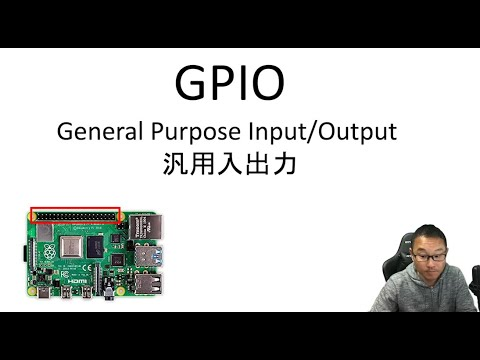

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3G3U7_o2QAM', width=400, height=225)

---
## 0 or 1を出す(読む)

ライブラリの準備\
ラズパイにデフォルトでインストールされているGPIO制御ライブラリはRPi.GPIOというものです。\
少し使いにくいライブラリであるため[pigpio](https://abyz.me.uk/rpi/pigpio/)を使いましょう。
```
import pigpio # pigpioライブラリの読み込み
pi = pigpio.pi() # pigpioの準備
```

0 or 1をGPIO 3に出す
```
pi.set_mode(3, pigpio.OUTPUT) # GPIO 3を出力に設定
pi.write(3, 1)    # GPIO 3をON(=1), OFF(=0)
```

GPIO 4から0 or 1を読む
```
pi.set_mode(4, pigpio.INPUT) # GPIO 4を入力に設定
print(pi.read(4))    # GPIO 4を読む
```

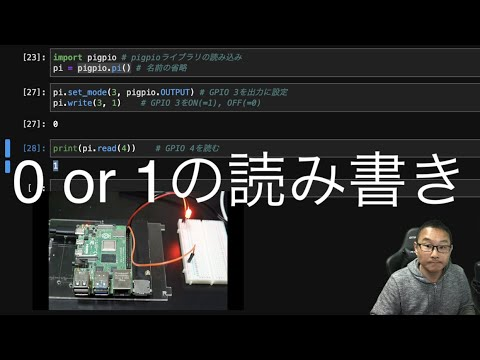

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZXDcyfy3yVs', width=400, height=225)

---
## 練習問題1
以下のコードは0から9までを1秒ごとに出力するサンプルコードである。\
このコードを元に，1秒ごとに10回点滅を繰り返すコードを書きなさい。\
GPIOピンは3を用いなさい。

In [ ]:
#サンプルコード
import pigpio  # pigpioライブラリの読み込み
import time    # 時間操作のためのライブラリ

# pigpioの初期化
pi = pigpio.pi()  # pigpioの準備
GPIO_PIN = 13 #GPIOピンの指定

try:
    for i in range(10):        # 0から9までiを1ずつ増加
        print(i)               #iを出力
        time.sleep(1)          # 1秒間待機
finally:
    pi.write(GPIO_PIN, 0)  # 終了時にGPIOをOFF
    pi.stop()              # pigpioの終了

In [ ]:
#ここにコードを記入しましょう。

---
## 練習問題2

以下のコードは，，，

In [ ]:
#サンプルコード

---
## 練習問題3
以下のコードは，，，

In [ ]:
#サンプルコード

---
## 補足説明
## 0.1を出す(PWM)
0 or 1ではなく0.1などを出力したい時の方法としてPWM (Pulse Width Modulation)という方法があります。PWM用のハードウェアクロックが使えるピンはGPIO 12 or 13です。書式は以下のようです。
```
pi.hardware_PWM("ピン番号", "周波数"，"duty比[%] * 10000")
```

例として，GPIO 12，周波数=1 KHz，duty比=10 %の時のコマンドは以下です。
```
pi.hardware_PWM(12, 1000, 10 * 10000)
```

PWMを終了するには
```
pi.write(12, 0)
```

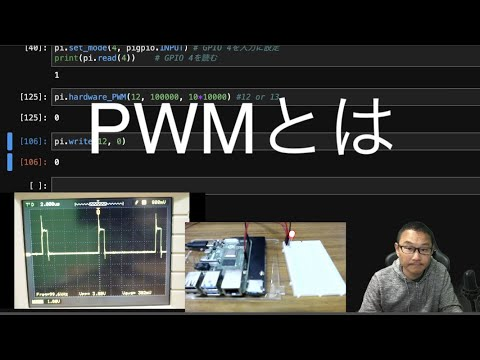

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('S4xhz9cqaSU', width=400, height=225)

## サーボ(SG90を例として
| サーボモーター | Raspberry Piのピン |
|----------------|---------------------|
| 茶色（GND）    | GNDピン             |
| 赤（VCC）      | 5Vピン              |
| オレンジ（Signal） | PWM用GPIOピン (例: GPIO12) |

https://akizukidenshi.com/goodsaffix/SG90_a.pdf

In [ ]:
import pigpio
import time

# 初期設定
servo_pin = 12  # GPIO12（PWM0ピン）
pi = pigpio.pi()

if not pi.connected:
    print("Failed to connect to pigpio daemon. Exiting.")
    exit()

# サーボを初期化
pi.set_mode(servo_pin, pigpio.OUTPUT)

# 関数: サーボの角度を設定
def set_servo_angle(angle):
    # SG90では角度を500～2500マイクロ秒のパルス幅に変換
    pulse_width = int(500 + (angle / 180.0) * 2000)
    pi.set_servo_pulsewidth(servo_pin, pulse_width)
    print(f"Angle: {angle}°, Pulse Width: {pulse_width} µs")

try:
    # 0°から180°まで動かして戻す
    for angle in range(0, 181, 10):
        set_servo_angle(angle)
        time.sleep(0.5)

    for angle in range(180, -1, -10):
        set_servo_angle(angle)
        time.sleep(0.5)

finally:
    # サーボを停止
    pi.set_servo_pulsewidth(servo_pin, 0)
    pi.stop()

---
# ネットワーク基礎
装置同士の通信について勉強しましょう。

---
## シリアル通信
次にアルファベットのような文字列を送るにはどうすれば良いでしょうか？
例えば'a'を2進数で表すと以下のようになります。:

In [ ]:
print(bin(ord('a'))) # アスキーコードを2進数

最初の'0b'の後の'1100001'が'a'を表します。

1100010 = b

1100011 = c

のようになります。これらを送る方法として7個のGPIOピンを使い，7桁の数字を送る方法が考えられ，この方法を7 bitの「パラレル通信」と言います。一方で使用するGPIOピンは1本(1 bit通信)で数字を順々に送る方法も考えられ，この方法を「シリアル通信」と言います。ここではシリアル通信について勉強します。

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('b0dBM6kwXfo', width=400, height=225)

---
### 非同期型シリアル通信(UART)
#### UART通信をするための準備
シリアル通信の1つであるUART通信を行ってみましょう。そのための準備をします。まずはターミナルからシリアル通信用のライブラリをインストールしましょう。
```
sudo apt -y install python3-serial
```
次にraspi-configでシリアル通信の設定を変更し，再起動します。

```
sudo raspi-config
```
3 Interface Options > I6 Serial Port

"Would you llike a login shell to be accesible over serial?"

No

Would you like the serial port hardware to be enabled?

Yes

その後，再起動します。

再起動後，以下のコマンドにより/dev/serial0がUARTを使えるように変更します。
```
sudo sh -c "echo 'dtoverlay=miniuart-bt' >> /boot/config.txt"
sudo sh -c "echo 'core_freq=250' >> /boot/config.txt"
```

その後，もう一度再起動しましょう。
```
sudo reboot
```
再起動後，以下のコマンドで /dev/serial0が ttyAMA0(普通のUART)となれば成功です。
```
ls -l /dev/serial*
```
lrwxrwxrwx 1 root root 5 Mar 15 12:37 /dev/serial0 -> ttyAMA0

lrwxrwxrwx 1 root root 7 Mar 15 12:37 /dev/serial1 -> ttyS0


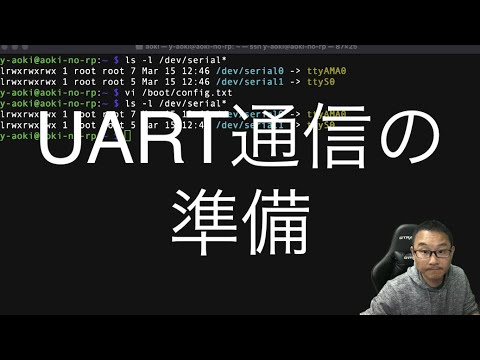

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('KuE4vsM4kFk', width=400, height=225)

UART通信をしてみよう
GPIO 14(TXD: 送信)，GPIO 15(RXD: 受信)

In [ ]:
import serial

#送る
ser = serial.Serial('/dev/serial0', 115200, timeout = 1.0)
ser.write(b'a')

#読む
c =ser.read(1)
print(c.strip().decode('utf-8'))

ser.close()

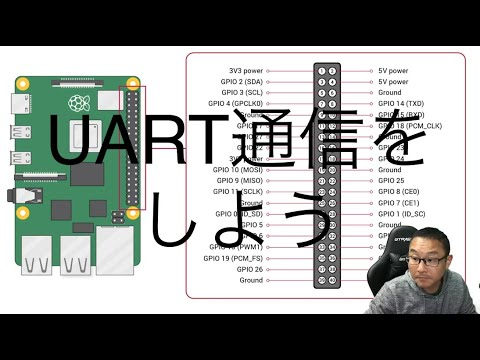

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('0IFU43HlaeQ', width=400, height=225)

---
### 同期型シリアル通信(I2C，SPI)
UART通信に必要なのはシグナル線だけでした。クロック線を追加して時刻を合わせることで同期型の通信をすることができるようになります。同期型のシリアル通信としてよく使われるのがI2CやSPIになります。クロックを出す機器がマスター，その他の機器がスレーブとして，マスターとスレーブ間の通信として動作します。また，スレーブとして複数の機器を接続可能であるため，スレーブにはアドレスの概念が発生します。

ラズパイ1台だけでマスターとスレーブの両方の役割を同時に果たすことはできないため，同期型のシリアル通信については実演は行わず説明のみとします。

#### I2C通信
- SCL: シリアルクロック (GPIO 3)
- SDA: シリアルデータ (GPIO 2)

#### SPI通信
- SCLK: シリアルクロック (GPIO 11)
- MISO: マスターイン・スレーブアウト (GPIO 9)
- MOSI: マスターアウト・スレーブイン (GPIO 10)
- SS: スレーブセレクト (GPIO 8, GPIO 7)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('_er90kvRzas', width=400, height=225)

### コンピュータ同士の通信
- IPアドレス
- MACアドレス
- FQDN

---
# AI基礎

---
## 機械学習とは？
[動画解説](https://www.youtube.com/watch?v=k8ea8724ojU&t=2s)

これまで学んできたように，Pythonという言語を用いることで，皆さんはコンピュータに指示を与えることができるようになりました。
コンピュータには適切な指示を与えないと正しい動作をしないことも分かったかと思います。

以下の計算をするときにコンピュータにどのような指示を与えないといけないかを考えてみましょう。
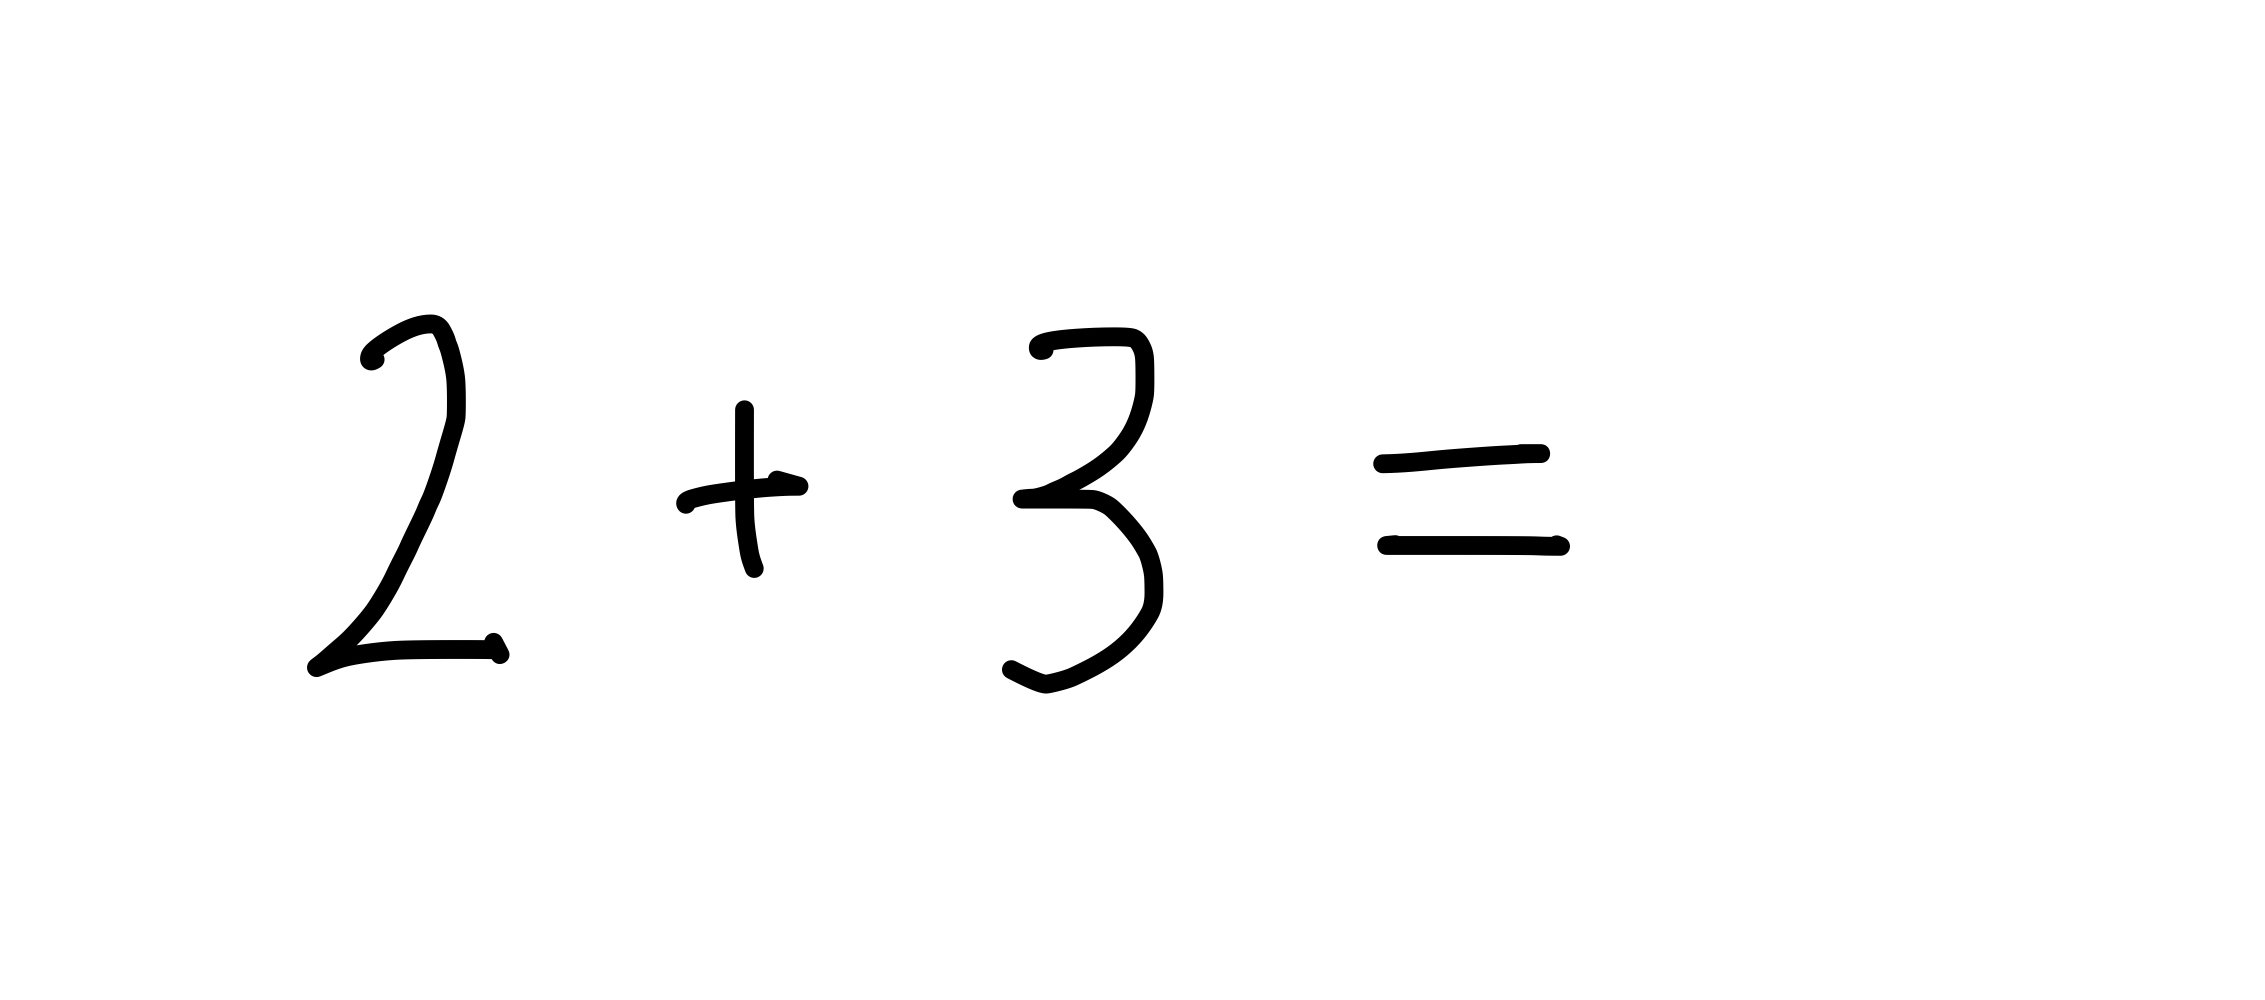

In [ ]:
2+3

2+3の足し算の計算は
```
2+3
```
を実行するだけのことです。

問題は，上の手書き画像をどのようにして`2+3`とコンピュータに読ませるかです。
手書きの`2`をコンピュータに読ませるために，与えるべき指示はなんでしょうか？

`2`の特徴は以下のように書けるかもしれません。

*  1画である
*   右回りから始まる
*   右回りの後に折り返しがある

しかし，それだけの特徴であると，以下も`2`であることになります。
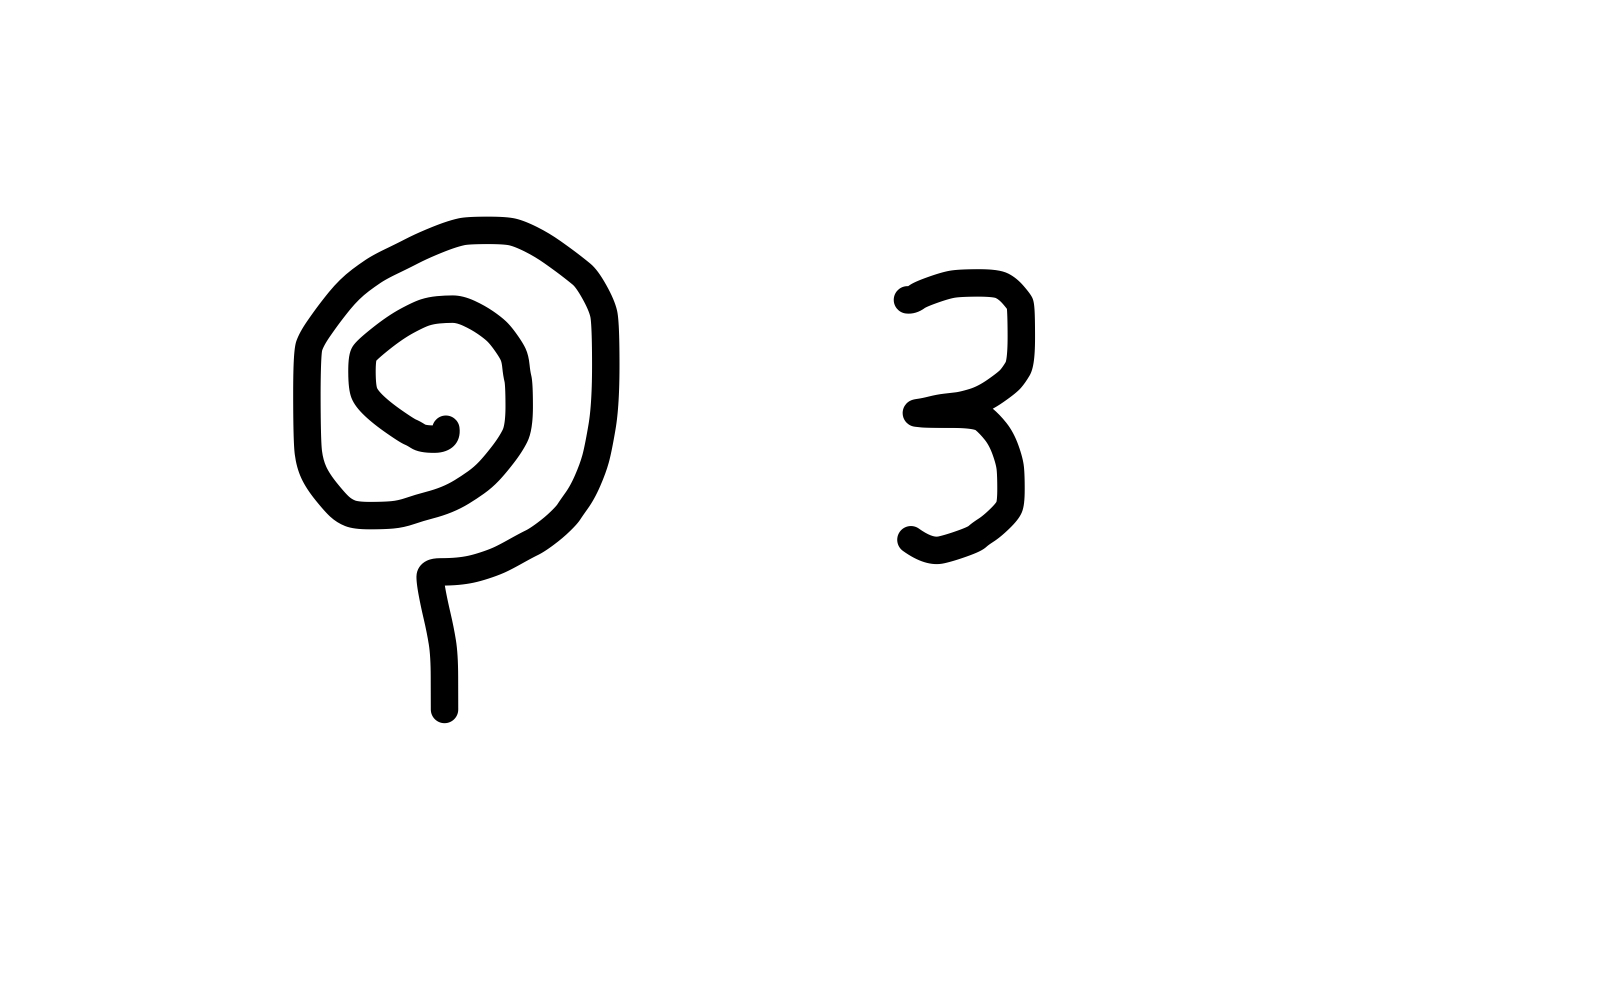

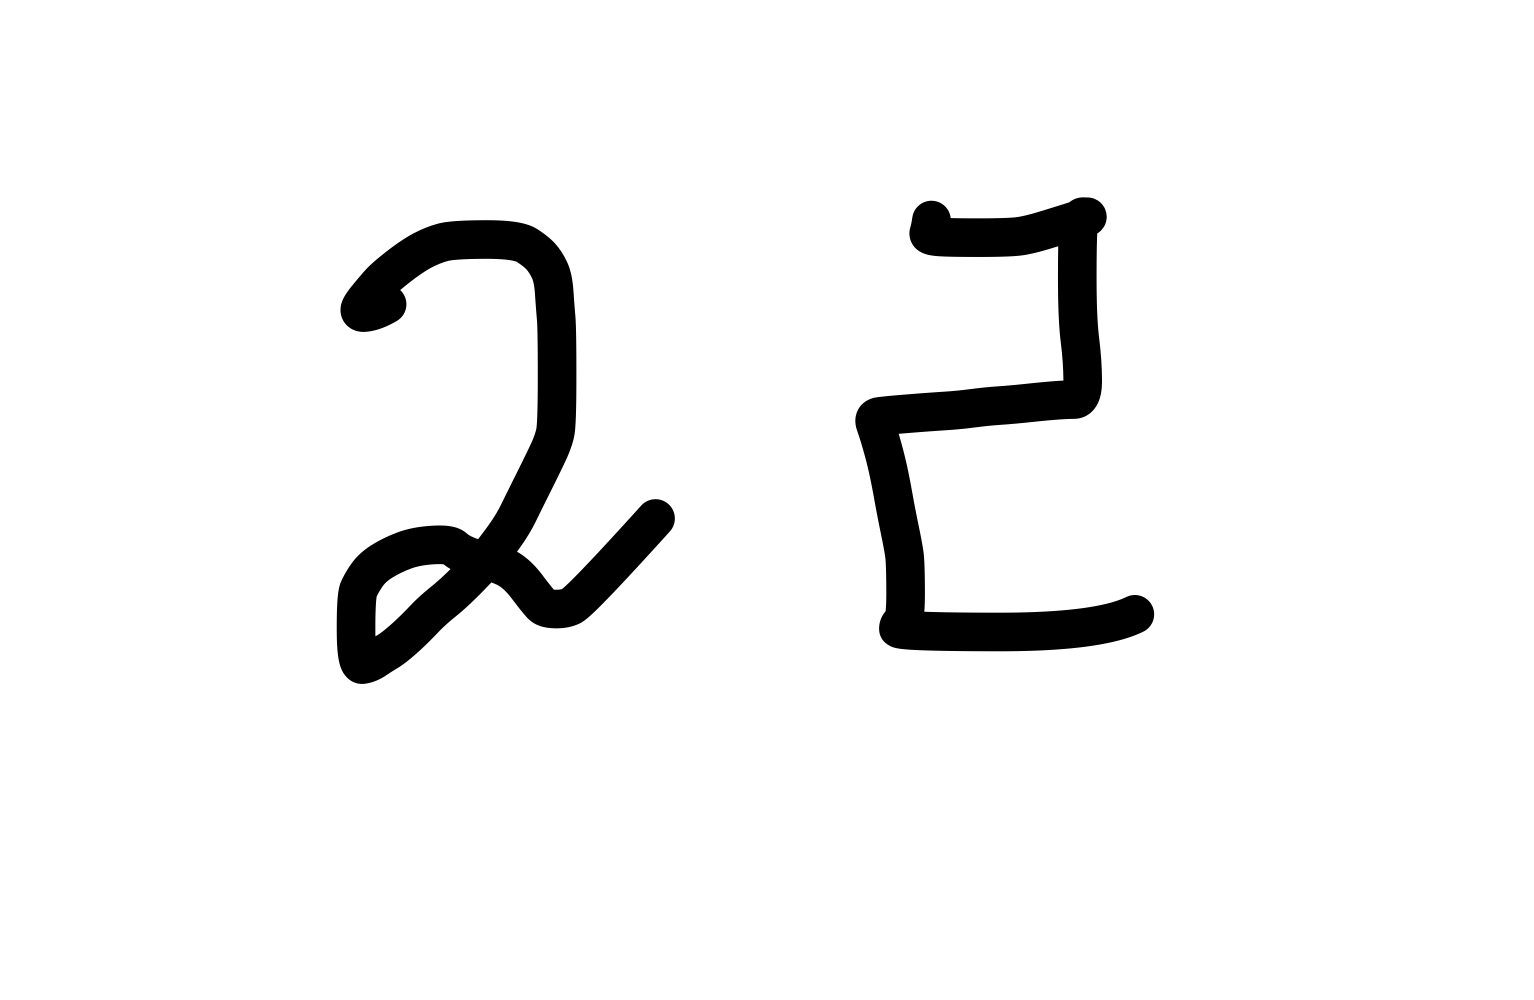

このように，ヒトであれば何気なくできることであっても，コンピュータに的確に指示することが難しいことが多くあり，この部分が解決できない限り，コンピュータができることは限定されます。

ヒトが何気なく行なっている作業をコンピュータに行わせるには，ヒトの脳の仕組みをコンピュータに実装する必要があります。この方法が**機械学習**です。そのためにはまず，ヒトの脳の仕組みを理解する必要がありそうです。

---
## 脳の仕組み
[解説動画](https://www.youtube.com/watch?v=HVnuWPVwKTo)

脳の仕組みの最も単純な部分を理解しましょう。脳の神経細胞(ニューロン)の模式図を以下に示します。

Complete_neuron_cell_diagram_en.svg

[Wikipediaより](https://ja.wikipedia.org/wiki/%E7%A5%9E%E7%B5%8C%E7%B4%B0%E8%83%9E)

---
## 人工ニューロンを作ってみよう(Teachable Machine)
[解説動画](https://www.youtube.com/watch?v=WfsltmicnW4&t=1s)

以下のような，`グー`と`チョキ`を区別する人工ニューロンを作ってみましょう。

人工ニューロンへの入力として`グー`または`チョキ`の画像が与えられ，判定結果が出力されるものとします。
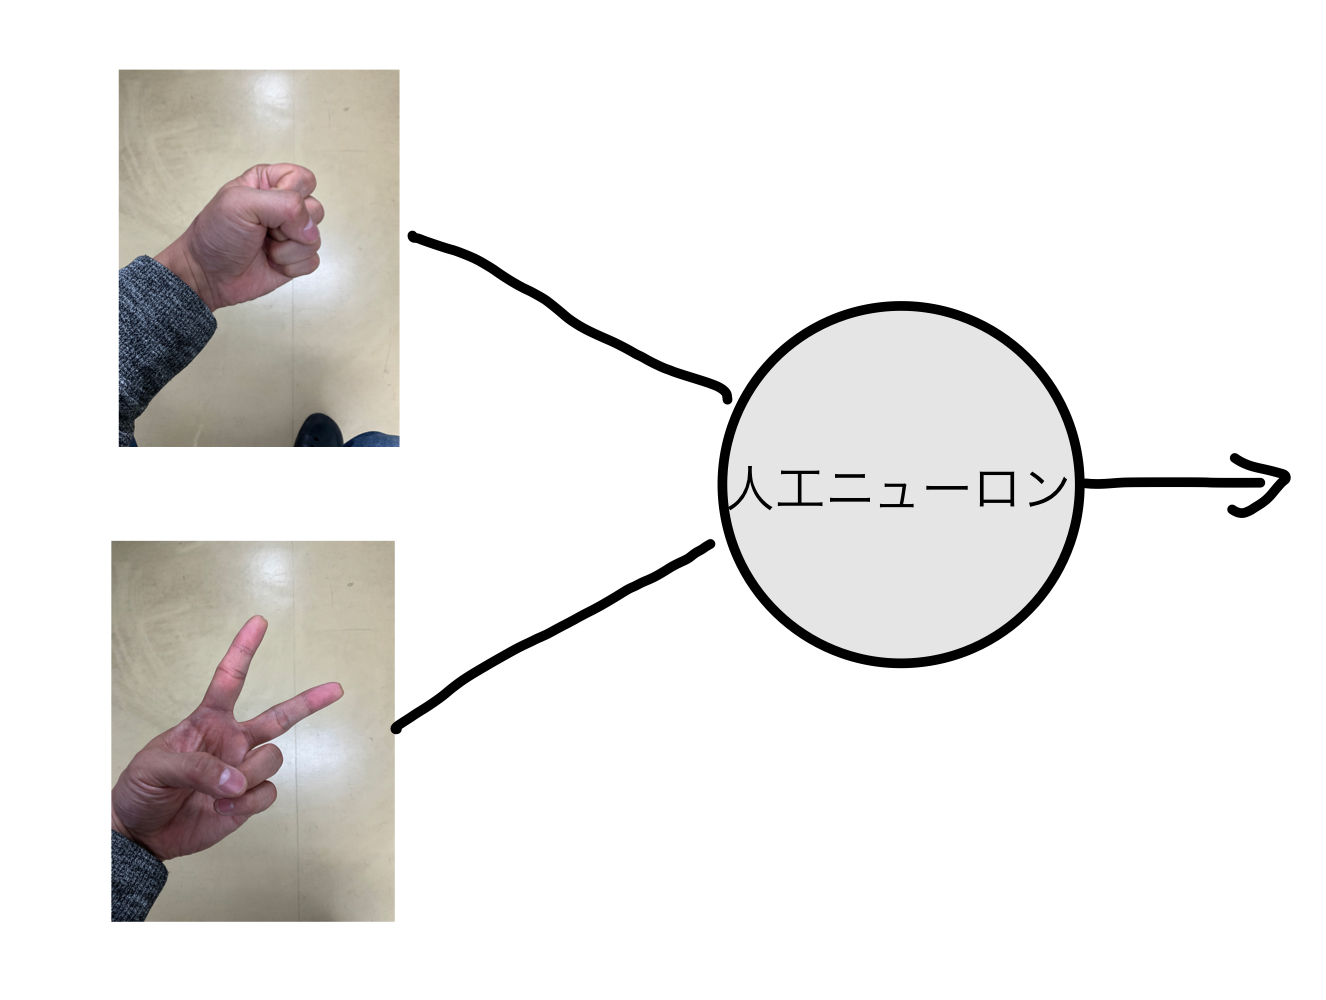


何はともあれ，グーとチョキを区別する人工ニューロンを作ってみよう！

Googleの[Teachable Machine](https://teachablemachine.withgoogle.com/train)を使いましょう。

* 「画像プロジェクト」→「標準の画像モデル」に進みます。

* 「Class 1」を「グー」，「Class 2」を「チョキ」に名前を変えます(下図参照)。
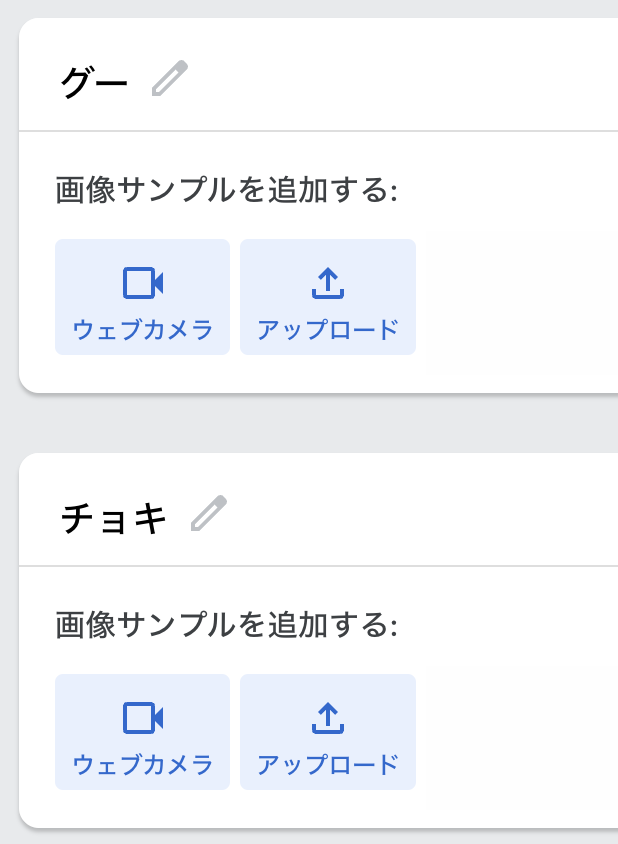

* 「ウェブカメラ」をクリックして「グー」と「チョキ」の写真をそれぞれ200枚程度づつ撮影します(下図参照)。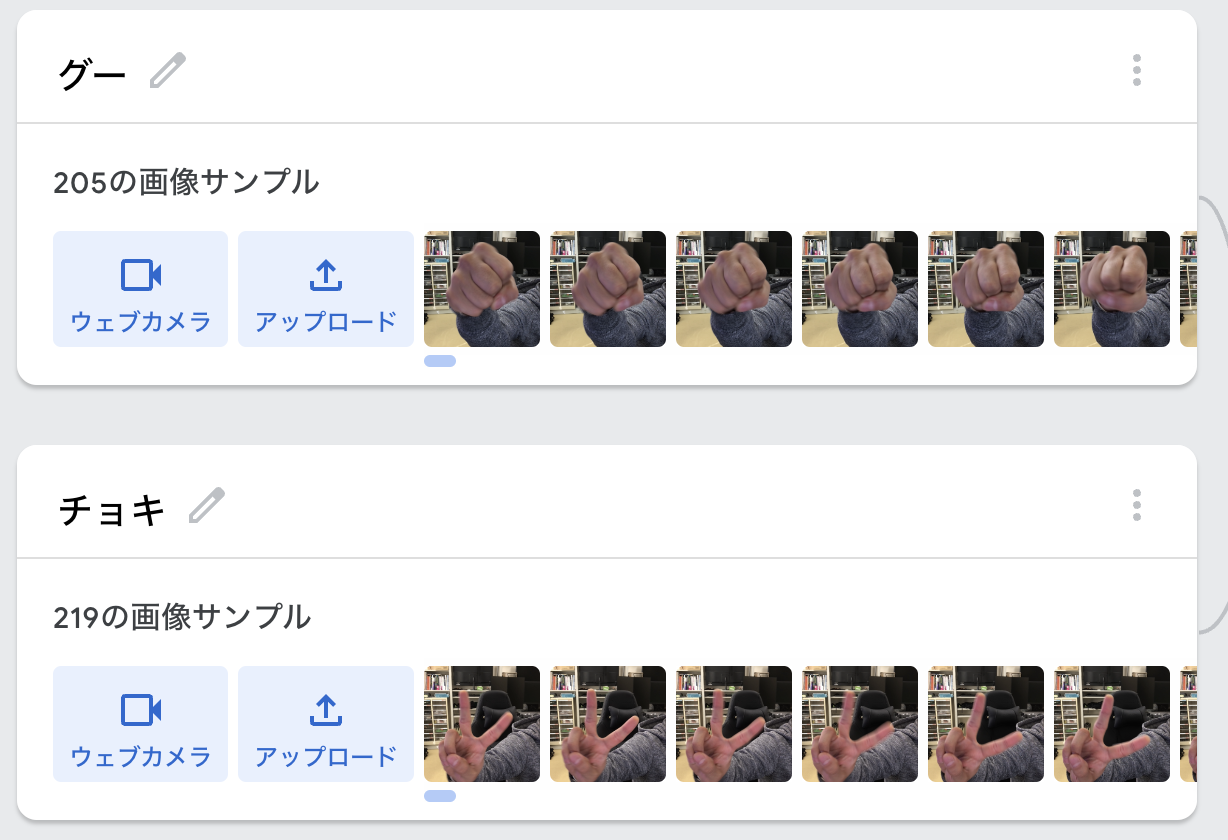

* 「グー」「チョキ」が正しく認識されることを確認(下の図はチョキの時の判定結果が100%の場合)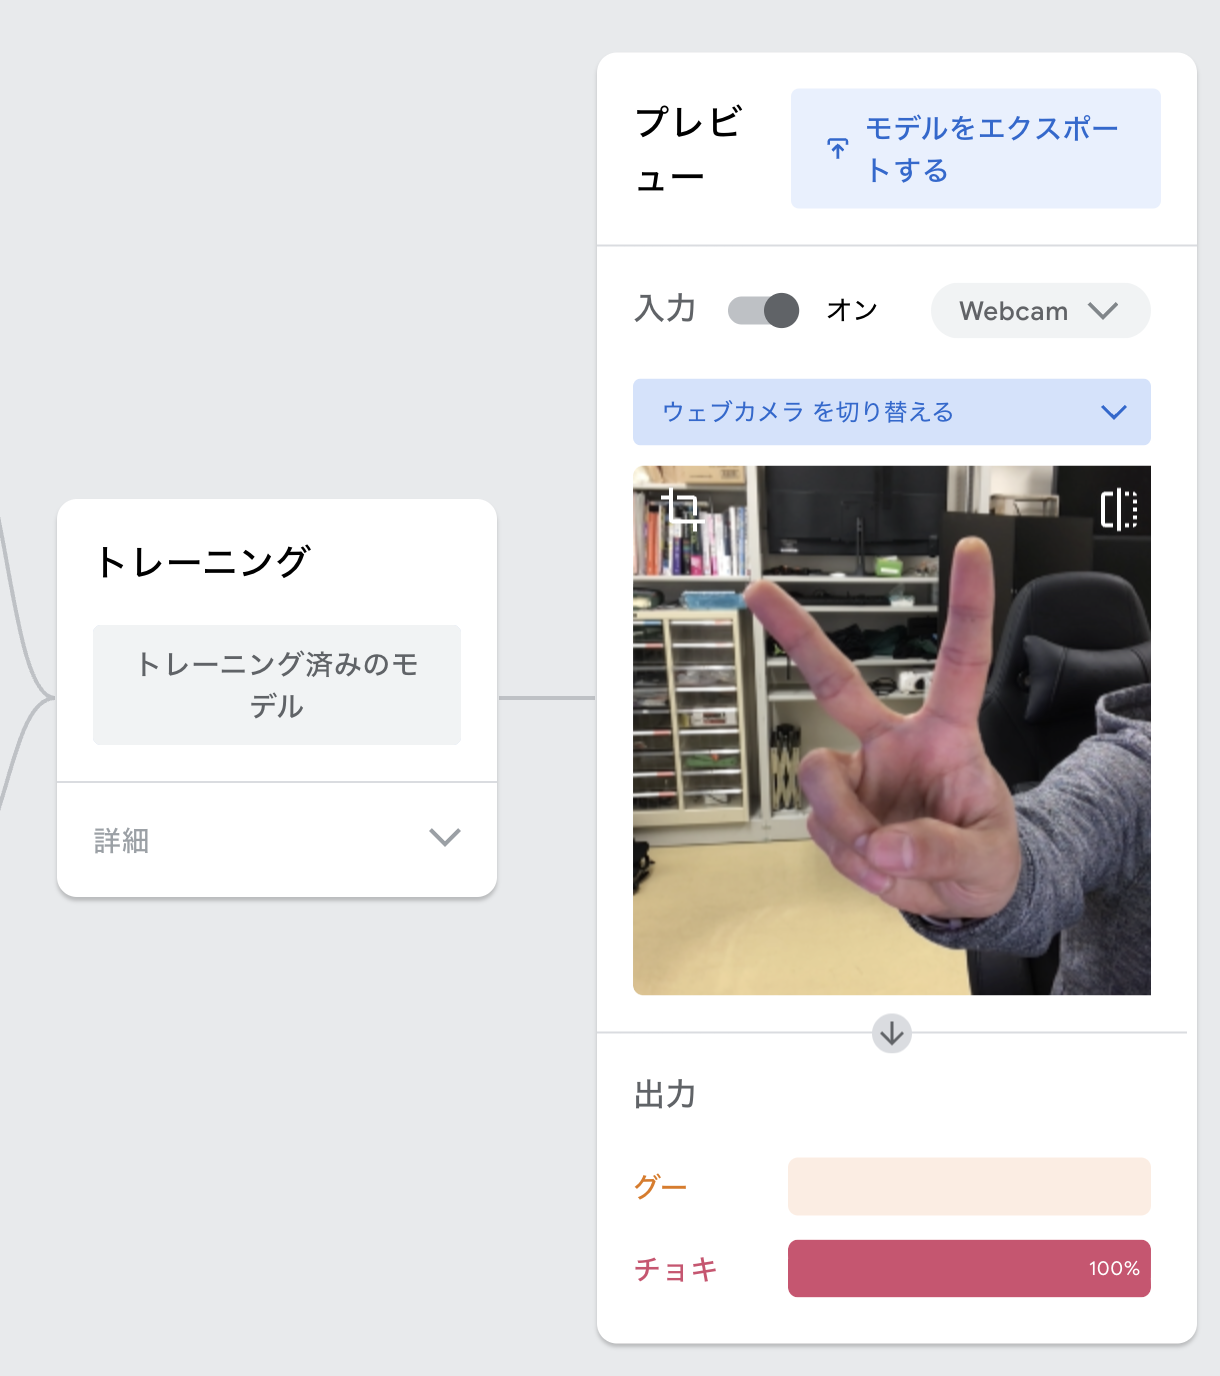

---
## 作った人工ニューロンの解説
[動画解説](https://www.youtube.com/watch?v=yd-2cOvx-dY)

Teachable Machineというアプリが作った人工ニューロンがどのようなものかを大雑把に説明します。

撮影した合計400枚程度の画像を「グー」と「チョキ」に正しく分類するための訓練を50回行なっています。このトレーニング回数を「エポック数」と呼びます。

作った人工ニューロンをダウンロードし，その中身を見てみましょう。

* 「モデルをエクスポートする」をクリック
* 「Tensorflow」をクリックし「モデルをダウンロード」をクリック(下図参照)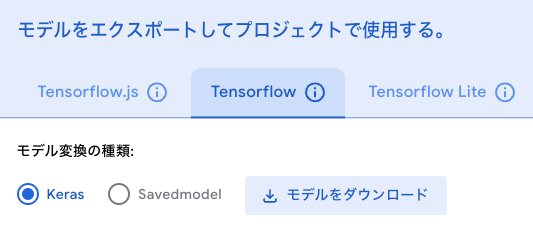

* 「converted_keras.zip」というzipファイルができるので解凍する
* 回答されたフォルダ(converted_keras)の中に，「keras_model.h5」「labels.txt」の2つのファイルがあることを確認(下図参照)

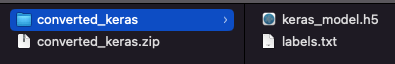

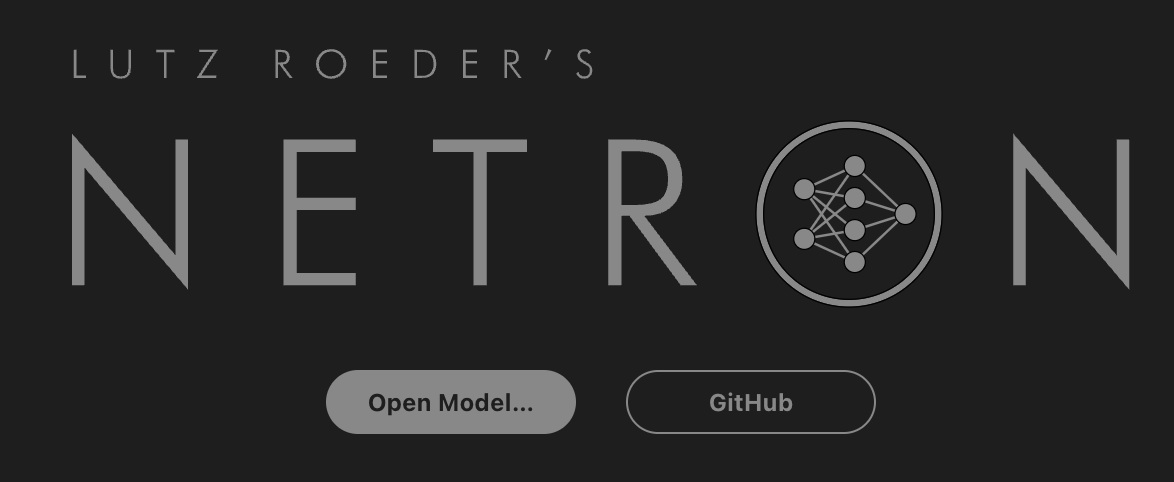

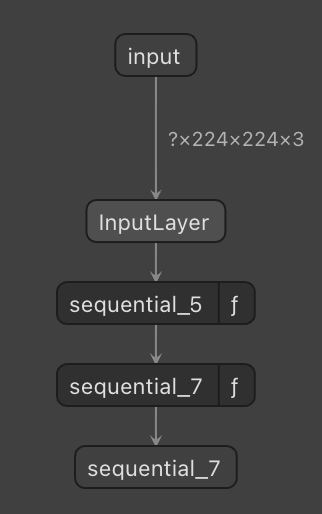

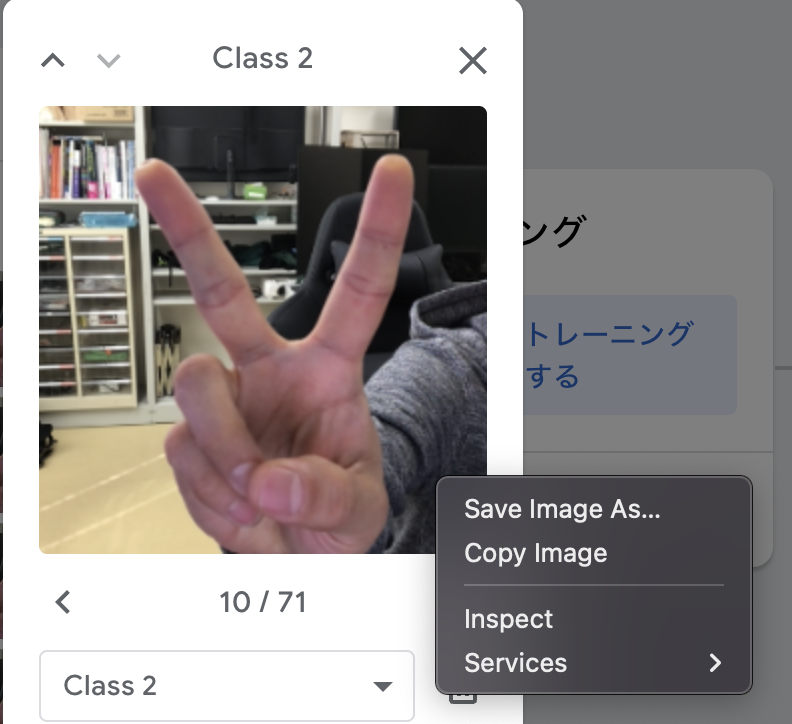

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps #Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# アップロードしたモデルのファイル名を入力しましょう。
model = load_model('keras_model.h5', compile=False)

# アップロードしたラベルのファイル名を入力しましょう。
class_names = open('labels.txt', 'r').readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# アップロードした「グー」あるいは「チョキ」のファイル名を入力しましょう。
image = Image.open('download.png').convert('RGB')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
#image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image = ImageOps.fit(image, size, Image.LANCZOS)
#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

print('Class:', class_name, end='')
print('Confidence score:', confidence_score)


---
## AIの実装

In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output


def capture():
    # カメラを初期化
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Camera could not be opened.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame from camera.")
                continue

            # 画像を表示（Jupyter内に表示）
            clear_output(wait=True)  # 前回の画像をクリア
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # BGRからRGBに変換
            plt.axis('off')  # 軸を非表示
            plt.show()
            time.sleep(1)  # 必要に応じて間隔を調整

    except KeyboardInterrupt:
        print("Stopped by user.")
    finally:
        cap.release()
        cv2.destroyAllWindows()

capture()

In [ ]:
import cv2
import numpy as np
import tflite_runtime.interpreter as tflite
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

def load_labels(path):
    with open(path, 'r') as f:
        return{i: line.strip() for i, line in enumerate(f.readlines())}

def capture_and_predict():
    # モデルとラベルの読み込み
    interpreter = tflite.Interpreter(model_path="model.tflite")
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    labels = load_labels("./labels.txt")

    # 入力テンソルのデータ型を取得
    input_dtype = input_details[0]['dtype']

    # カメラを初期化
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Camera could not be opened.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame from camera.")
                continue

            # 画像を表示（Jupyter内に表示）
            clear_output(wait=True)  # 前回の画像をクリア
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # BGRからRGBに変換
            plt.axis('off')  # 軸を非表示
            plt.show()

            # 画像の前処理
            img = cv2.resize(frame, (224, 224))

            if input_dtype == np.uint8:
                # UINT8に変換
                img = img.astype(np.uint8)
            elif input_dtype == np.float32:
                # FLOAT32に変換して正規化
                img = img.astype(np.float32) / 255.0

            img = np.expand_dims(img, axis=0)

            # 推論
            interpreter.set_tensor(input_details[0]['index'], img)
            interpreter.invoke()
            output_data = interpreter.get_tensor(output_details[0]['index'])

            # 結果の表示
            predicted_class = np.argmax(output_data)
            confidence = output_data[0][predicted_class]

            print(f"Predicted class: {labels[predicted_class]}, Confidence: {confidence:.4f}")

            time.sleep(1)  # 必要に応じて間隔を調整

    except KeyboardInterrupt:
        print("Stopped by user.")
    finally:
        cap.release()
        cv2.destroyAllWindows()

capture_and_predict()

---
## sound classification

In [ ]:
import numpy as np
import sounddevice as sd
import tflite_runtime.interpreter as tflite
import scipy.signal
import time

# モデルとラベルのパス
MODEL_PATH = "sound/soundclassifier_with_metadata.tflite"
LABELS_PATH = "sound/labels.txt"

# サンプリングレート（Teachable Machineのモデルに合わせて調整）
SAMPLE_RATE = 16000
DURATION = 1  # 秒

# モデルをロード
interpreter = tflite.Interpreter(model_path=MODEL_PATH)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# モデルの入力形状を確認
print(f"Model expects input shape: {input_details[0]['shape']}")

# ラベルをロード
with open(LABELS_PATH, "r") as f:
    labels = [line.strip() for line in f.readlines()]

# オーディオキャプチャと前処理
def preprocess_audio(audio, sample_rate):
    # モデルが期待する入力サイズを取得
    expected_length = input_details[0]['shape'][1]
    # リサンプリング
    resampled_audio = scipy.signal.resample(audio, expected_length)
    # ゼロパディング
    padded_audio = np.zeros(expected_length)
    padded_audio[:min(len(resampled_audio), len(padded_audio))] = resampled_audio
    # 正規化と整形
    audio_input = np.expand_dims(padded_audio, axis=0).astype(np.float32) / np.max(np.abs(padded_audio))
    return audio_input

# 推論を実行
def predict(audio_input):
    interpreter.set_tensor(input_details[0]['index'], audio_input)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return np.argmax(output_data), output_data[0]

# リアルタイム分類
def classify_audio():
    print("Listening...")
    while True:
        try:
            # 音声をキャプチャ
            audio = sd.rec(int(SAMPLE_RATE * DURATION), samplerate=SAMPLE_RATE, channels=1, dtype='float32')
            sd.wait()

            # 前処理
            audio_input = preprocess_audio(audio[:, 0], SAMPLE_RATE)

            # 推論
            predicted_class, confidence = predict(audio_input)

            # 結果を表示
            print(f"Predicted: {labels[predicted_class]} (Confidence: {confidence[predicted_class]:.2f})")

            time.sleep(0.1)  # 必要に応じて調整
        except KeyboardInterrupt:
            print("Stopped by user.")
            break

# 実行
classify_audio()

---
#FAQ
設定ファイルの作成は[こちら](https://cmd-gunma-univ.github.io/DX-highschool/wifi-hostname.html)から